# Text Processing
Examining the text within a selection of articles about the 1904 World's Fair from regional and national newspapers from 2 specific dates:
- 5/1/1904: The date immediately after the Fair opened on 4/30/1904.
- 12/2/1904: The date immediately after the Fair closed on 12/1/1904.

File format is:
- Line 0: Newspaper name
- Line 1: Town name
- Line 2: State name
- Lines 3-...: Headline and article

In [17]:
# pip install --user -U nltk

  Using cached nltk-3.6.5-py3-none-any.whl (1.5 MB)
     |████████████████████████████████| 288 kB 3.1 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  NOTE: The current PATH contains path(s) starting with `~`, which may not be expanded by all applications.
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os 
import pandas as pd
import sys
import re, string
import numpy as np
import matplotlib.pyplot as plt
import nltk

In [51]:
# Path to clippings folder
clippingsDir = '/Users/hannah-anderson/Desktop/AMCS336/amcs336fl21/clippings'

# Path to opening day directory and its internal directories
openingDir = clippingsDir + '/opening'
openingRegDir = openingDir + '/regional'
openingNatDir = openingDir + '/national'

# Path to closing day directory and its internal directories
closingDir = clippingsDir + '/closing'
closingRegDir = closingDir + '/regional'
closingNatDir = closingDir + '/national'

# Test statements
# os.listdir(clippingsDir)
# os.listdir(openingDir)
# os.listdir(openingRegDir)
# os.listdir(openingNatDir)
# os.listdir(closingDir)
# os.listdir(closingRegDir)
# os.listdir(closingNatDir)

Going to start by extracting the paper, city, and state; removing punctuation from the article; and making the article lowercase for each clipping.

I'm also going to remove stop words from the token arrays. As Wikipedia says, stop words are the most common words that many search engines avoid, for the purposes of saving space and time in processing of large data. I'm sourcing mine from Ranks NL English stopwords list: https://www.ranks.nl/stopwords . I also have added more, since processing (everything after 'yourselves').

In [152]:

stopwords = ['a','about','above','after','again','against','all','am','an','and','any','are','arent','as','at','be','because','been','before','being','below','between','both','but','by','cant','cannot','could','couldnt','did','didnt','do','does','doesnt','doing','dont','down','during','each','few','for','from','further','had','hadnt','has','hasnt','have','havent','having','he','hed','hes','her','here','heres','hers','herself','him','himself','his','how','hows','i','id','ill','im','ive','if','in','into','is','isnt','it','its','itself','lets','me','more','most','mustnt','my','myself','no','nor','not','of','off','on','once','only','or','other','ought','our','ours','ourselves','out','over','own','same','shant','she','shed','shell','shes','should','shouldnt','so','some','such','than','that','thats','the','their','theirs','them','themselves','then','there','theres','these','they','theyd','theyll','theyre','theyve','this','those','through','to','too','under','until','up','very','was','wasnt','we','wed','well','were','weve','werent','what','whats','when','whens','where','wheres','which','while','who','whos','whom','why','whys','with','wont','would','wouldnt','you','youd','youll','youre','youve','your','yours','yourself','yourselves','','came','will','upon','r','h','l','e','tha','led','j','thy','—','m','s','de','mr','toward','throughout']




In [153]:
# openingRegDir
openingRegArticles = []
for filename in os.listdir(openingRegDir):
    if filename != '.ipynb_checkpoints':
        path = openingRegDir+"/"+filename
        result = ""
        lineIdx = 0
        openingRegObj = {}
        with open(path, 'r') as f:
            for line in f:
                if lineIdx == 0:
                    # paper = line
                    openingRegObj["paper"] = line[0:-1]
                elif lineIdx == 1:
                    # city = line
                    openingRegObj["city"] = line[0:-1]
                elif lineIdx == 2:
                    # state = line
                    openingRegObj["state"] = line[0:-1]
                else:
                    for word in line.split():
                        result =  result + word + " "
                lineIdx = lineIdx + 1
        openingRegObj["text"] = result
        lowerNoPunc = result.lower().translate(str.maketrans("", "", string.punctuation))
        openingRegObj["cleanedText"] = lowerNoPunc
        openingRegObj["tokens"] = lowerNoPunc.split(" ")
        cleanedTokens = openingRegObj["tokens"]
        for s in stopwords:
            cleanedTokens = list(filter(lambda a: a != s, cleanedTokens))
        openingRegObj["cleanedTokens"] = cleanedTokens
        openingRegArticles.append(openingRegObj)


In [154]:
# openingNatDir
openingNatArticles = []
for filename in os.listdir(openingNatDir):
    if filename != '.ipynb_checkpoints':
        path = openingNatDir+"/"+filename
        result = ""
        lineIdx = 0
        openingNatObj = {}
        with open(path, 'r') as f:
            for line in f:
                if lineIdx == 0:
                    # paper = line
                    openingNatObj["paper"] = line[0:-1]
                elif lineIdx == 1:
                    # city = line
                    openingNatObj["city"] = line[0:-1]
                elif lineIdx == 2:
                    # state = line
                    openingNatObj["state"] = line[0:-1]
                else:
                    for word in line.split():
                        result =  result + word + " "
                lineIdx = lineIdx + 1
        openingNatObj["text"] = result
        lowerNoPunc = result.lower().translate(str.maketrans("", "", string.punctuation))
        openingNatObj["cleanedText"] = lowerNoPunc
        openingNatObj["tokens"] = lowerNoPunc.split(" ")
        cleanedTokens = openingNatObj["tokens"]
        for s in stopwords:
            cleanedTokens = list(filter(lambda a: a != s, cleanedTokens))
        openingNatObj["cleanedTokens"] = cleanedTokens
        openingNatArticles.append(openingNatObj)

In [155]:
# closingRegDir
closingRegArticles = []
for filename in os.listdir(closingRegDir):
    if filename != '.ipynb_checkpoints':
        path = closingRegDir+"/"+filename
        result = ""
        lineIdx = 0
        closingRegObj = {}
        with open(path, 'r') as f:
            for line in f:
                if lineIdx == 0:
                    # paper = line
                    closingRegObj["paper"] = line[0:-1]
                elif lineIdx == 1:
                    # city = line
                    closingRegObj["city"] = line[0:-1]
                elif lineIdx == 2:
                    # state = line
                    closingRegObj["state"] = line[0:-1]
                else:
                    for word in line.split():
                        result =  result + word + " "
                lineIdx = lineIdx + 1
        closingRegObj["text"] = result
        lowerNoPunc = result.lower().translate(str.maketrans("", "", string.punctuation))
        closingRegObj["cleanedText"] = lowerNoPunc
        closingRegObj["tokens"] = lowerNoPunc.split(" ")
        cleanedTokens = closingRegObj["tokens"]
        for s in stopwords:
            cleanedTokens = list(filter(lambda a: a != s, cleanedTokens))
        closingRegObj["cleanedTokens"] = cleanedTokens
        closingRegArticles.append(closingRegObj)

In [156]:
# closingNatDir
closingNatArticles = []
for filename in os.listdir(closingNatDir):
    if filename != '.ipynb_checkpoints':
        path = closingNatDir+"/"+filename
        result = ""
        lineIdx = 0
        closingNatObj = {}
        with open(path, 'r') as f:
            for line in f:
                if lineIdx == 0:
                    # paper = line
                    closingNatObj["paper"] = line[0:-1]
                elif lineIdx == 1:
                    # city = line
                    closingNatObj["city"] = line[0:-1]
                elif lineIdx == 2:
                    # state = line
                    closingNatObj["state"] = line[0:-1]
                else:
                    for word in line.split():
                        result =  result + word + " "
                lineIdx = lineIdx + 1
        closingNatObj["text"] = result
        lowerNoPunc = result.lower().translate(str.maketrans("", "", string.punctuation))
        closingNatObj["cleanedText"] = lowerNoPunc
        closingNatObj["tokens"] = lowerNoPunc.split(" ")
        cleanedTokens = closingNatObj["tokens"]
        for s in stopwords:
            cleanedTokens = list(filter(lambda a: a != s, cleanedTokens))
        closingNatObj["cleanedTokens"] = cleanedTokens
        closingNatArticles.append(closingNatObj)

Now, using the cleaned tokens, I'm going to build a dictionary of key-value pairs with the number of occurrences of each token in each article. I will do this at the opening regional level, the opening national level, the opening level, the closing regional level, and the closing national level, the closing level, and the overall level.

In [157]:
import operator
openingRegCounts = {}
for i in range(len(openingRegArticles)):
    tokens = openingRegArticles[i]["cleanedTokens"]
    for t in tokens:
        if openingRegCounts.__contains__(t):
            openingRegCounts[t] = openingRegCounts[t] + 1
        else:
            openingRegCounts[t] = 1
openingRegCounts = dict( sorted(openingRegCounts.items(), key=operator.itemgetter(1),reverse=True))

In [158]:
openingNatCounts = {}
for i in range(len(openingNatArticles)):
    tokens = openingNatArticles[i]["cleanedTokens"]
    for t in tokens:
        if openingNatCounts.__contains__(t):
            openingNatCounts[t] = openingNatCounts[t] + 1
        else:
            openingNatCounts[t] = 1
openingNatCounts = dict( sorted(openingNatCounts.items(), key=operator.itemgetter(1),reverse=True))

In [159]:
openingCounts = {}
for k in openingRegCounts:
    openingCounts[k] = openingRegCounts[k]
for k in openingNatCounts:
    if openingCounts.__contains__(k):
            openingCounts[k] = openingCounts[k] + openingNatCounts[k]
    else:
        openingCounts[k] = openingNatCounts[k]
openingCounts = dict( sorted(openingCounts.items(), key=operator.itemgetter(1),reverse=True))

In [160]:
closingRegCounts = {}
for i in range(len(closingRegArticles)):
    tokens = closingRegArticles[i]["cleanedTokens"]
    for t in tokens:
        if closingRegCounts.__contains__(t):
            closingRegCounts[t] = closingRegCounts[t] + 1
        else:
            closingRegCounts[t] = 1
closingRegCounts = dict( sorted(closingRegCounts.items(), key=operator.itemgetter(1),reverse=True))

In [161]:
closingNatCounts = {}
for i in range(len(closingNatArticles)):
    tokens = closingNatArticles[i]["cleanedTokens"]
    for t in tokens:
        if closingNatCounts.__contains__(t):
            closingNatCounts[t] = closingNatCounts[t] + 1
        else:
            closingNatCounts[t] = 1
closingNatCounts = dict( sorted(closingNatCounts.items(), key=operator.itemgetter(1),reverse=True))

In [162]:
closingCounts = {}
for k in closingRegCounts:
    closingCounts[k] = closingRegCounts[k]
for k in closingNatCounts:
    if closingCounts.__contains__(k):
            closingCounts[k] = closingCounts[k] + closingNatCounts[k]
    else:
        closingCounts[k] = closingNatCounts[k]
closingCounts = dict( sorted(closingCounts.items(), key=operator.itemgetter(1),reverse=True))

In [163]:
allCounts = {}
for k in closingCounts:
    allCounts[k] = closingCounts[k]
for k in openingCounts:
    if allCounts.__contains__(k):
            allCounts[k] = allCounts[k] + openingCounts[k]
    else:
        allCounts[k] = openingCounts[k]
allCounts = dict( sorted(allCounts.items(), key=operator.itemgetter(1),reverse=True))

Now, I will use these dicts to do some exploratory data analysis of the word frequencies using bar charts.

First, I will filter the dict for words with more than 5 occurrences and plot the dict.

In [164]:
# Filter out counts of 1
openingRegCountsFilt = {key:val for key, val in openingRegCounts.items() if val > 5}

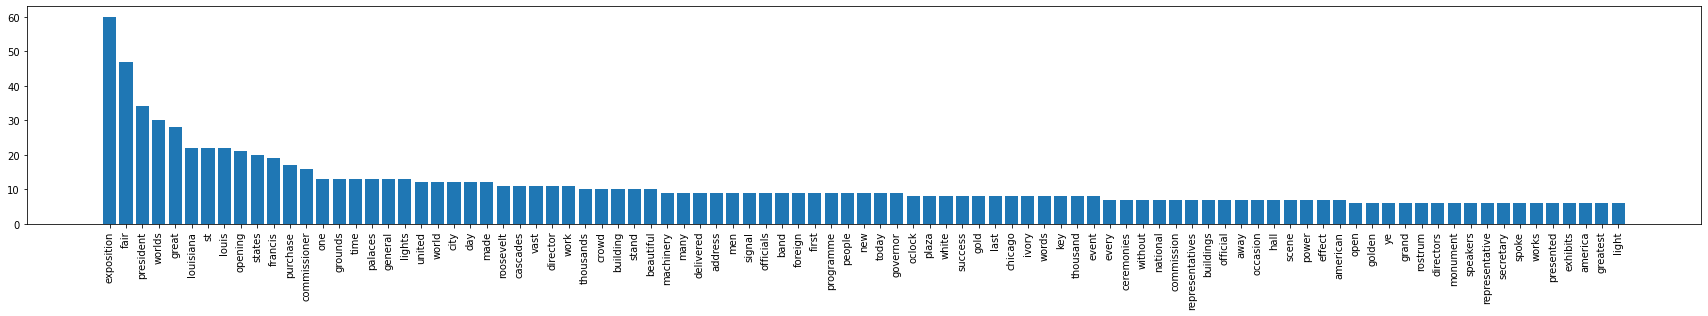

In [166]:
fig = plt.figure()
plt.bar(range(len(openingRegCountsFilt)), list(openingRegCountsFilt.values()), align='center')
plt.xticks(range(len(openingRegCountsFilt)), list(openingRegCountsFilt.keys()), rotation=90)
fig.set_figwidth(30)
plt.show()

In [169]:
# Filter out counts of 1
openingNatCountsFilt = {key:val for key, val in openingNatCounts.items() if val > 5}

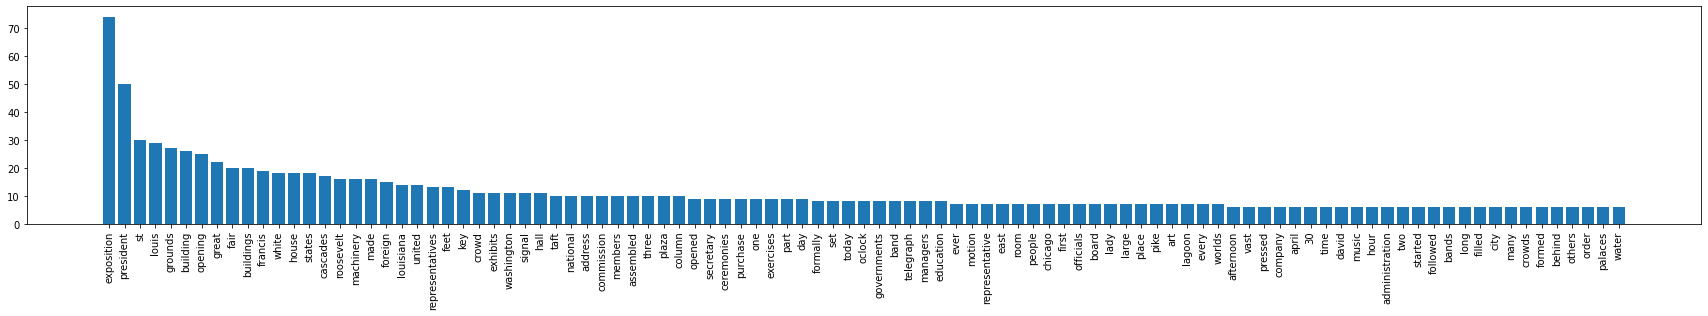

In [170]:
fig2 = plt.figure()
plt.bar(range(len(openingNatCountsFilt)), list(openingNatCountsFilt.values()), align='center')
plt.xticks(range(len(openingNatCountsFilt)), list(openingNatCountsFilt.keys()), rotation=90)
fig2.set_figwidth(30)
plt.show()

In [171]:
# Filter out counts of 1
openingCountsFilt = {key:val for key, val in openingCounts.items() if val > 5}

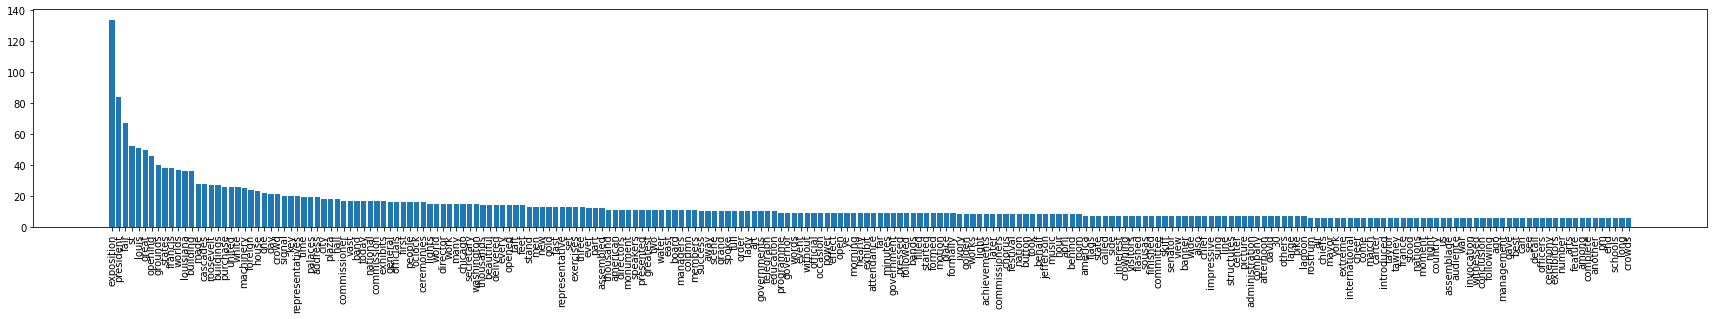

In [172]:
fig3 = plt.figure()
plt.bar(range(len(openingCountsFilt)), list(openingCountsFilt.values()), align='center')
plt.xticks(range(len(openingCountsFilt)), list(openingCountsFilt.keys()), rotation=90)
fig3.set_figwidth(30)
plt.show()

In [173]:
# Filter out counts of 1
closingRegCountsFilt = {key:val for key, val in closingRegCounts.items() if val > 5}

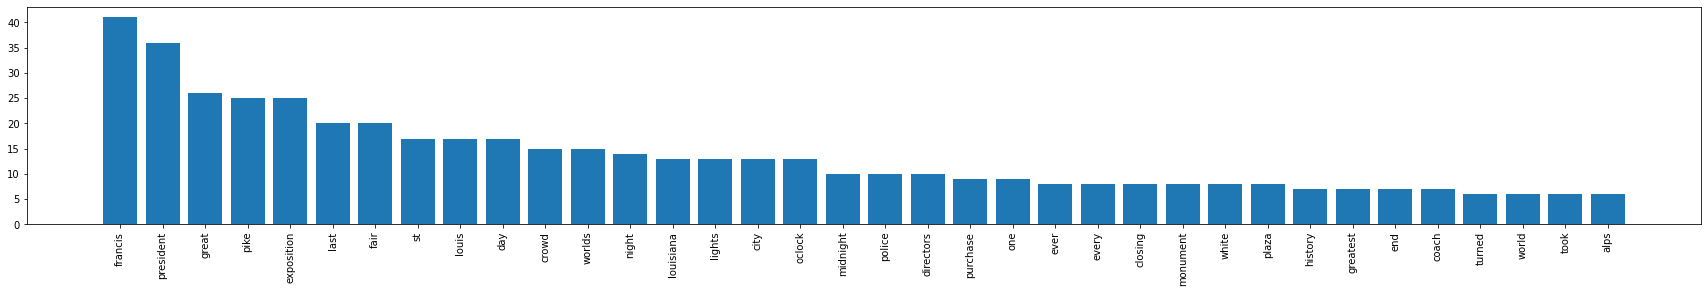

In [174]:
fig4 = plt.figure()
plt.bar(range(len(closingRegCountsFilt)), list(closingRegCountsFilt.values()), align='center')
plt.xticks(range(len(closingRegCountsFilt)), list(closingRegCountsFilt.keys()), rotation=90)
fig4.set_figwidth(30)
plt.show()

In [175]:
# Filter out counts of 1
closingNatCountsFilt = {key:val for key, val in closingNatCounts.items() if val > 5}

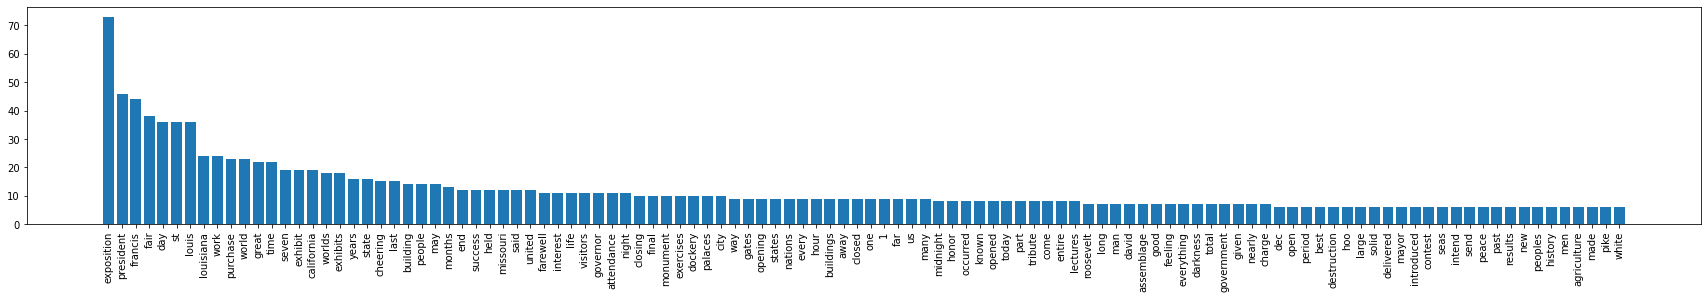

In [176]:
fig5 = plt.figure()
plt.bar(range(len(closingNatCountsFilt)), list(closingNatCountsFilt.values()), align='center')
plt.xticks(range(len(closingNatCountsFilt)), list(closingNatCountsFilt.keys()), rotation=90)
fig5.set_figwidth(30)
plt.show()

In [177]:
# Filter out counts of 1
closingCountsFilt = {key:val for key, val in closingCounts.items() if val > 5}

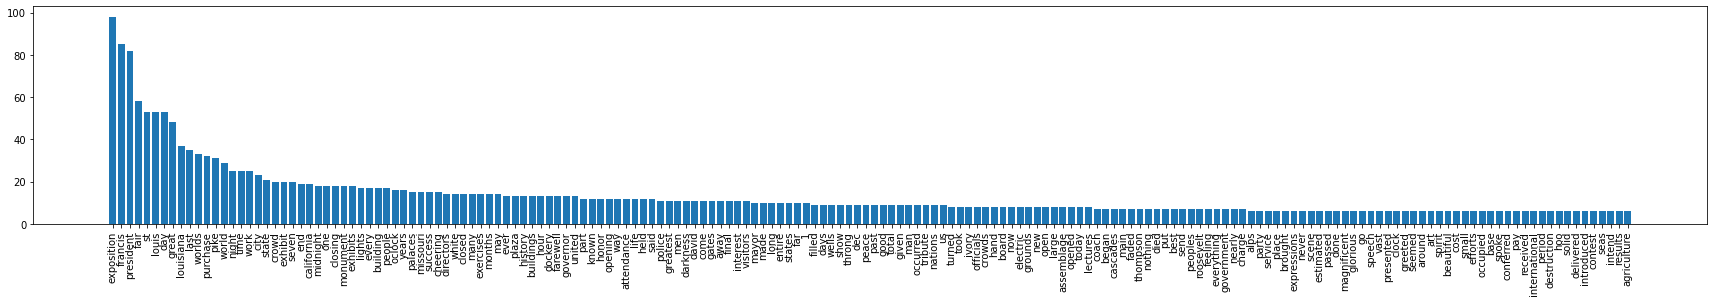

In [178]:
fig6 = plt.figure()
plt.bar(range(len(closingCountsFilt)), list(closingCountsFilt.values()), align='center')
plt.xticks(range(len(closingCountsFilt)), list(closingCountsFilt.keys()), rotation=90)
fig6.set_figwidth(30)
plt.show()

In [179]:
# Filter out counts of 1
allCountsFilt = {key:val for key, val in allCounts.items() if val > 10}

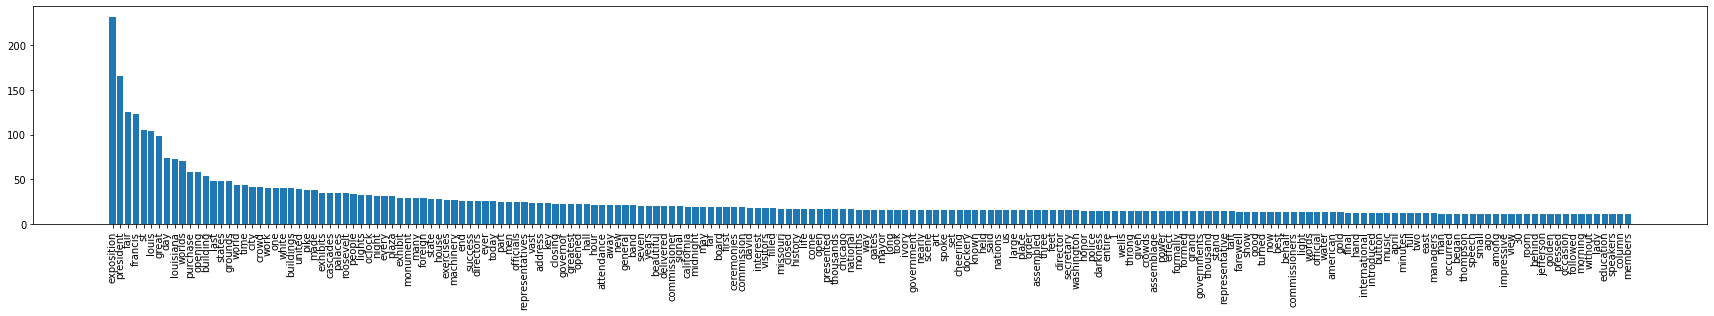

In [180]:
fig7 = plt.figure()
plt.bar(range(len(allCountsFilt)), list(allCountsFilt.values()), align='center')
plt.xticks(range(len(allCountsFilt)), list(allCountsFilt.keys()), rotation=90)
fig7.set_figwidth(30)
plt.show()

As you can see from the above graphs, simply looking at all tokens doesn't do a lot of good. It tells us a lot about the events of the day and the features emphasized (e.g. Francis, the Cascades), but I want to gauge more specifically the kinds of language used to describe the Fair. To do this, I'm going to further filter these dictionaries out with my own stop words to target how the Fair was talked about.

In [181]:
 #Focus on words that occur more than once; since i will filter all others anyway
fairStopwords = [
    'becoming', 'expand','lawns', 'floral', 'house', 'treble', 'addressing', 'banner', 
    'meaning', 'seen', 'delivers', 'fans', 'dais', 'sat', 'influences', 'aggrandizement', 
    'fragile', 'study', 'marsh', 'yielding', 'waves', 
    'headed', 'british', 'granite', 'hotels', 'experiences', 'greet', 'instead', 
    'pleasures', 'threescore', 'southwest', 'face', 'exsenator', 'countries', 'attraction', 
    'wheels', 'genius', 'batch', 'extent', 'stone', 'pathway', 'attached', 'encouragement', 
    'country', 'productions', 'onehundredth', 'trouble', 'clank', 'demonstrated', 
    'additional', 'beholdd', 'anyone', 'creations', 'universities', 'chatting', 
    'purpose', 'lantern', 'written', 'promise', 'never', 'water', 'yellowstone', 
    'possibly', 'washington', 'representing', 'spencer', 'joining', 'peaks', 
    'centenary', 'approach', 'many', 'centennary', 'plants', 'teachers', '1214', 
    'calendar', 'structures', 'edmund', 'pay', '11', 'direction', 'touched',
    'thereby', 'opening', 'blast', 'drama', 'everything', 'convinced', 'tribune', 'scope', 
    'police', 'occupied', 'skiff', 'features', 'trio', 
    'dispatches', 'credentials', 'appear', 'clusters', 'sons', 'install',
    'numbers', 'recollections', 'starting', 'tower', 'manifested', 'catch', 'stnrspangled', 
    'staff', '20000000', 'hearers', 'date', 'cataract', 'california', 'gave', 
    'phalanx', 'dash', 'pestillence', 'climax', 'institute', 'raise', 'workers', 
    'vies', 'dozen', 'marched', 'ocean', 'lay', 'rapid', 
    'perceptible', 'statue', 'enveloped', 'liverty', 'doubt', 'important', 'agricultural', 
    'green', 'messages', 'rank', 'falls', 'desk', 'source', 'notables', 'excursion', 'sorts', 
    '128', 'promenade', 'transferring', 'launching', 'fact', 
    'instantly', 'arranged', 'able', 'rush', '8000000', 'nook', 'way', 'color', 'taft', '1893', 
    'crawling', 'twice', 'included', 'thorn', 'arm', 'show', 
    'anything', 'worshipers', 'veteran', 'fade', 'staffs', 'flushing',
    'works', 'revelry', 'talked', 'outriders', 'prospects', 'concluded', '500', 'coloradoans', 
    'metropolis', 'paved', 'reign', 'employes',  'fellows', 'frank', 
    'produced', 'human', 'allen', 'watches', 'sometimes', 'spreading', 'girls', 
    'incited', 'legrave', 'collections', 'explosion', 'except', 
    'louis', 'burnham', 'execution', 'presidential', 'michel', 
    'finished', 'early', 'count', 'seemed', 'era', 'clock', 
    'soon', 'law', 'gen', 'employed', 'careless', 'californias', 'revealed', 'brazil', 
    '18317457', 'atlantic', 'gets', 'listeners', 'every',  
    'rest', 'cloudless', 'van', 'appearance', 'marble', 'men', 'towers', 'right',
    'divisions', 'half', 'pumping', 'edge', 'assemble', 'reach', 'center', 
    'held', 'requested', 'factor', 'sung', 'try', 'site', 'put', 
    'promises', 'introduction', 'unable', 'winnipeg', 'case', 
    'excluded', 'strong', 'twentyfive', 'spain', 'stockholders', 
    'humming', 'pranks', 'obtained', 'died', 'conducted', 'stock', 
    'least', 'rows', 'emotions', 'sample', 'periodically', '18750000', 
    'populace', 'understanding', 'loyalty', 'gallons', 'builldings', 
    'dotted', 'wills', 'collection', 'garments', 'estimated', 
    'expressing', 'displayed', 'operators', 'parts', 'toole', 'francis', 
    'residents', 'typifies', 'today', 'cascade', 'coat', 'contributions', 
    'concentrated', 'filcher', 'funmaking', 'publicity', 'imposing', 'cable', 'per', 'tribute', 
    'realized', 'limits', 'dividend', 'ranges', 'satisfied', 'awaiting', 'encroached', 
    'art', 'preside', 'seats', 'jests', 'stretching', 'pays', 'urn', 'exclusively', 
    'waters', 'gras', 'welfare', 'develops', 'pouring', 'tube', 'manifold', 'revisited', 'kind', 
    'feet', 'within',  'breaker', 'acres', 'designated', 'public', '115', 'bulbs', 
    'schools', 'wise', 'ahead', 'unworth', 'allsides', 'already', 
    'inclines', 'observation', 'distance', 'known', 
    'admiration', '1', 'progress', 'accomplishments', '1492', 'latin', 'use', 'sanguine', 
    'ring', 'fast', 'breath', 'bulb', 'byways', 'helen', 'call', 'indication', 
    'six', 'condition', 'hammers', 'running', 'vegetables', 'china', 'preparedness', 'switch', 
    'indeed', 'adorned', 'speakers', 'summit', 'particularly', 'lanes', 'grace', 'executive', 
    'tabooed', 'dustcovered', 'unhesitatingly', 'meeting', 'operate', 'duty', 'v', 'taylors', 
    'institution', 'partly', 'makes', 'smithers', 'steel', 'method', 
    'drove', 'diploma', 'finds', 'rostrum', '40000horsepower', 'demonstrate', 'delight', 
    'response', 'types', 'corn', 'honored', 'death', 'japanese', 'admissions', 
    'thanked', 'shrieks', 'intersected', 'borne', 'caption', 'consideration', 'skiffs', 'tea', 
    'chorus', 'laurel', 'owing', 'greeting', 'surveyed', 'escorted', 'solid', 'payne', 
    'lewald', 'cavalry', '5000', 'respects', 'cables', 'hollow', 'confined', 
    '1200', 'excitement', 'colleagues', 'stop', 'began', 'pageant', 'especial', 'empire', 'thou', 
    'openinng', 'riding', 'details', 'thought', 'bands', 'moment', 'outward', 'battle', 'four', 
    'flags', 'midnight', 'custom', 'paraphrased', 'mornings', 'plaudite', 'war', 'filling', 
    'addresses', 'closest', 'granted', 'slashed', 'addmissions', 'thermometer', 
    'receivedliterature', 'station', 'sights', 'accidents', 'park', 'social', 'custodian', 
    'pace', 'lift', 'eall', 'percentage', 'calls', 'intervened', 'lamps', 'title', 'gain', 
    'operator', 'friends', 'delectation', 'dc', 'cities', 'fairly', 'morning', 'moments', 
    'doctor', 'tinsel', 'goods', 'holiday', 'clime', 'clink', 'purloined', 'witnessed', 
    'respect', 'company', 'plaza', 'theodor', 'lindell', 'tumbling', 'repeated', 'gallon', 
    'guardians', 'outset', 'real', '20', 'splash', 'name', 'overnight', 'commissionergeneral',
    'benefit', 'veritable', 'tied', 'motor', 'keys', 'revel', 'concerning', 'helpfulness', 
    '18500000', 'ax', 'exchanged', 'key', 'electrical', 'coffee', 'compliance', 'charged', 
    'cent', 'nation', 'gathered', 'foam', 'miss', 'unbecoming', 'institutes', 'kilbourne', 
    'terraces', 'turns', 'kinds', 'walked', 'farther', 'handling', 'cuba', 'make', 'neath', 
    'pervade', 'slightest', 'caused', 'attended', 'preliminary', 'installed', 'away', 'sixty', 
    'concessions', 'sentinels', 'auld', 'endedd', 'al', 'period', 'effects', 'witness', 
    'theodore', 'stevens', 'ninetyfive', 'influence', 'sculpture', 'fingers', 'automobiles', 
    'minutes', 'tyrolean', 'ribs', 'sense', 'crops', 'accompanying', 'high', 'invested', 
    'sousa', 'fisheries', 'activity', 'industries', 'b', 'newyork', 'openingday', 'gate', 
    'samuel', 'henry', 'filed', 'assumed', 'infantrymen', 'outpouring', 'level', 'hurt', 
    'shall', 'shone', 'covers', 'glimmer', 'decided', 'thirty', 'splendidity', 'gold', 
    '4600000', 'tempore', 'strain', 'somewhat', 'step', 'delays', 'available', 
    'aisle', 'pinned', 'august', 'town', 'exhibits', 'chanced', 'hoped', 'grounds', 
    'carter', 'oak', 'inception', 'prize', 'george', 'result', 'forward', 'buildings', 
    'let', 'side', 'handler', 'produce', 'grouns', 'reluctant', 'consumed', 'sentences', 
    'thirst', 'greece', 'glory', 'insignias', 'costumea', 'second', 'takes', 'farewells', 
    'words', 'indorse', 'withstand', 'whichh', 'area', 'budding', 'recently', 'means', 
    'insisted', 'discovery', 'remotest', 'management', 'dr', 'sides', 'emds', 'fabrications', 
    'ability', 'bordered', 'standard', 'manager', 'believe', 'associates', 'pomp', 
    'ejectment', 'even', 'teeth', 'lines', 'weather', 'thrown', 'factories', 'federal', 
    'dreams', 'approaching', 'toil', 'boiler', 'paul', 'followed', 'zone', 'misty',
    'fell', '14000000', 'citizen', 'fiftyone', 'transported', 'strance', 'wines', 'strains', 
    'ohio', 'participating', 'cognizance', 'spread', 'formal', 'reservation', 'come', 
    'invocation', 'among', 'present', 'stedman', 'woman', 'lose', 'showrooms', 'realizing', 
    'knowles', '300000000', 'columbus', 'festus', 'dawnlight', 'plazas', 'contrast', 
    'lights', 'engines', 'accredited', '4', 'wells', 'fidelity', 'peabody', 'operation', 
    'circuit', 'enough', 'addressed', 'redwood', 'affair', 'esteban', 'realize', 'brings', 
    'souvenir', 'contest', 'appeased', 'grood', 'extreme', 'enhance', 'supplementary', 
    '6000000', 'dignity', 'reap', 'preparations', '200000', 'contents', 'nothing', 
    'southern', 'crash', 'ranked', 'aided', '157', 'walks', 'north', 'modesty', 'comes', 
    'lily', 'lips', 'jovial', 'plan', 'william', 'onslaughts', 'terrace', 'birthday', 'mo', 
    'victors', 'expectation', 'die', 'watching', 'dethroned', 'view', 'performed', 
    'effecting', 'sympathy', 'life', 'scheme', 'common', 'reading', 'ago', '6', 
    'adjectives', 'arrangement', 'accompaniment', '1st', 'worked', 'flow', 'wanting', 
    'vied', 'bar', 'style', 'invasion', 'afternoons', 'outlining', 'norman', 'may', 
    'numbered', 'whispering', 'wandered', 'w', 'longing', 'carriages', 'consider', 'create', 
    'latest', 'play', 'boundary', 'appeared', 'colorado', 'bring', 'lords', 'cars', 'probably',
    'unfloored', 'bugles', 'part', '630', 'britain', 'sheet', 'surface', 'fort', 'possession', 
    'taking', 'builded', 'arrived', 'paid', 'admitted', 'insignia', 'phosphorescent', 
    'comments', 'acknowledged', 'whan', '130', 'march', 'deliver', 'municipality', 'belgium', 
    'preferred', 'swing', 'yield', 'releasing', 'sunday', 'field', 'announces', 
    'transportation', 'franciss', 'location', 'resting', 'capital', 'chaste', 
    'conversation', 'quickly', 'peoples', 'kal', 'austriahungary', 'working', 'squads', 
    'literature', 'costumes', 'attending', 'places', 'disappeared', 'lun', 'joined', 'rankin', 
    'invariably', 'achieved', 'fiery', 'nature', 'school', 'rays', 'slope', 'pampas', 
    'department', 'dedicated', 'predictions', 'alaska', 'singing', 'conferred', 'sort', 
    'looked', 'spur', 'hoo', 'potentialities', 'sincerity', 'deferred', 'finding', 'covered', 
    'shrubs', 'manning', 'discharge', 'seat', 'pacific', 'elsewhere', 'k', 'stolen', 
    'provided', 'situation', 'none', 'tell', 'risen', 'hon', 'boulevard', 'pavilions', 
    'throats', 'originally', 'fellow', 'erwln', 'looks', 'territories', 'noises', 
    'deliberation', 'faces', 'conceivable', 'auspices', 'saber', 'knew', 'plateau', 'without', 
    'roosevelts', 'rising', 'technical', 'yeoman', 'ships', 'lapel', 'goes', 'france', 
    'fountains', 'floated', 'say', 'error', 'bearing', 'overflowing', 'push', 'floodgates', 
    'heralded', 'placed', 'start', 'fruits', 'nearly', 'spared', 'isaac', 'conveying', '1230', 
    'pillars', 'touch', 'score', 'guardsmens', 'industrial', 'settled', '15', 'bouquet', 
    'clearing', 'century', 'help', 'burg', 'domes', 'started', 'mind', 'statler', 'upper', 
    'ray', 'waiters', 'comprised', 'bpencer', 'upbuilding', 'finally', 'bates', 'c', 
    'washed','rent', 'straw', 'summerall', 'syne', 'group', 'abrew', 'gushes', 'following', 
    'silvery', 'clicked', 'territorial', 'existence', 'manufacturers', 'responded', 
    'reverend', 'official', 'encouraged', '1803', 'venture', 'appreciated', 'alternate', 
    'finery', 'broad', 'pillar', 'carefully', 'brief', 'taylor', 'duration', 'square', 
    'stuckens', 'variety', 'sunrise', 'traced', 'fittingly', 'week', 'afford', 'dressed', 
    'chronicles', 'agriculture', 'arrival', 'proclaimed', 'pilgrimage', 'received', 'vanished', 
    'fleck', 'dean', 'postal', 'soft', 'rioters', 'expectantly', 'starspangled', 'around', 
    'paper', 'behind', 'restaurant', 'commands', 'unison', 'furlong', 'committeeman', 
    'loggias', 'hour', 'along', 'partner', 'reply', 'shortyly', 'band', 'demolition', 
    'wild', 'five', 'express', 'stream', 'drinking', 'crimson', 'according', 'grudging', 
    'tawdry', 'describe', 'aisles', 'wail', 'highly', 'can', 'regard', 'programme', 
    'preceded', 'dresses', 'speaker', 'attend', 'delegation', 'enlivenment', 'mass', 
    'called', 'f', 'foremost', 'ministers', 'greely', '10', '240000', 'occupations', 'join', 
    'aubdivided', '55000', 'platform', 'record', 'back', 'adopted', 'stereopticon', 
    'libraries', 'symmetry', 'stilled', 'privilege', 'battened', 'currents', 'warm', 
    'foreigners', 'train', 'backed', 'wheatley', 'cease', 'marin', 'significance', 
    'observers', 'friday', 'twenty', 'directly', 'bunches', 'eliciting', 'fighting', 
    'ladies', 'speaks', 'proposed', 'mrs', 'feared', 'yellow', 'presides', 'diameter', 
    '745', 'equaled', 'occurred', 'roar', 'interests', 'reasons', 'act', 'reception', 
    'mr', 'celebrate', 'visible', 'cases', 'japan', 'inspected', 'switchboard', 'proportion', 
    'carrying', 'exhibit', '18767457', 'exchange', 'purchase', 'acknowledge', 'interchange', 
    'took', 'bells', 'circles', 'mayor', 'assistant', 'etc', 'fought', 'hands', 'constitution', 
    '11430', 'decorating', 'receive', 'section', 'napoleons', 'last', 'ot', 'growth', 
    'highways', 'keeping', 'november', 'hazy', 'orisons', 'taps', 'composed', 'baltimore', 
    'aching', 'impromptu', 'stating', 'fair', 'andd', 'foaming', 'kindly', 'watched', 
    'tolled', 'cane', 'far', 'required', 'emptied', 'ciity', 'senate', 'things', 'acts', 
    'lagoons', 'invitation', 'athletic', 'fewer', 'delivered', 'notes', 'keen', 'feelingly', 
    'oriental', 'st', 'wreath', 'continent', 'seeing', 'roofs', 'organization', 'clad', 
    'rear', 'tho', 'stedmans', 'bazaars', 'inspection', 'marine', 'sounds', 'hiss', 'pact', 
    'receives', 'roamed', 'october', 'industry', 'appearances', 'cleverly', 'worth', 'mud', 
    '1904', 'borealis', 'returning', 'commonwealth', 'sale', 'hardly', 
    'adjourned', 'similarly', '1802', 'judging', 'crawled', 'hours', 'tastes', 'daubs', 
    'natured', 'strictly', 'laughter', 'leave', 'correspondent', 'gould', 'smiles', 
    'description', 'screen', 'esteem', 'erwin', 'car', 'anniversary', 'pouredd', '150', 
    'nicholas', 'advancement', 'committees', 'expresident', 'handed', 'twentyone', 'major', 
    'local', 'spouting', 'dispensed', 'element', 'barley', 'wealth', 'louisans', 
    'acclamation', 'tender', 'peanuts', 'harmony', 'injured', 
    'guess', 'noted', 'speak', 'felt', 'contrasted', 'raised', 'times', 
    'faithfulness', 'splendor', 'lands', 'john', 'babbling', 'occasions', '232000', 
    'seekers', 'assured', 'pressure', 'brotherhood', 'charles', 'summarized', 
    'opened', 'gathering', '75000', 'changing', 'pause', 'twelve', 'floor', 'concealed', 
    'feature', 'flung', 'remainder', 'cheering', 'lurked', 'arranging', 'calling', 'hnd', 
    'rather', 'passing', 'disposition', 'powers', 'manifestation', 'wine', 'sweeping', 
    'representative', 'original', 'lest', 'wear', 'lasted', 'untraveled', 'richness', 
    'marks', 'look', 'jules', 'man', 'three', 'proceedings', 'moving', 'broader', 
    'initial', 'compelled', 'crucial', 'design', 'lang', 'crowning', 'sheets', 'steal', 
    'flowers', 'grown', 'ten', 'since', 'gracefully', 'whistles', 'silk', 'resolutions', 
    'one', 'stamps', 'development', 'stages', 'insulated', 'clean', 'buffalo', 'gause', 
    'admit', 'action', 'hast', 'earth', 'emotion', 'applause', 'forth', 'charge', 'lighted', 
    'wore', 'resemble', 'attained', 'wellls', 'tinted', 'employees', 'chaffee', 'function', 
    'referred', 'glowing', 'contribute', 'beginning', 'material', 'typifying', 'want', 
    'strength', 'midst', 'several', 'recognized', 'lagrave', 'settings', 'rippling', 
    'territory', 'believed', 'expecting', 'state', 'sure', 'shrine', 'harriman', 
    'prophecy', 'feeling', 'wide', 'arriving', '3651873', 'storm', 'measured', 'endeavor', 
    'reigned', 'benjamin', 'divided', 'brew', 'individuality', 'hestitation', 'best', 
    'secretary', 'g', 'goverrnment', 'seems', 'waited', 'wafted', 'innes', 'waterways', 
    'connections', 'behalf', 'prologue', 'epoch', 'sovereign', 'intend',
    'tall', 'thoroughfares', 'approval', 'dockey', 'engineering', 'orders', 'fired', 'tells', 
    '5000000', 'belief', 'hold', 'seaboard', 'people', 'assembly', 'natural', 'detract', 
    '1215', 'light', 'everywhere', 'enthusiastically', 'nearby', 'surmounting', 'setting', 
    'foreign', 'personal', 'hitch', 'display', 'struck', 'participants', 'bestowed', 
    'festivities', 'likewise', 'precautions', 'announcement', 'facade', 'gained', 
    'request', 'concluding', 'eight', 'dealers', 'degree', 'sunbeams', 'mightier', 
    'professional', 'shared', 'frosty', 'cooperate', 'renewed', 'celebration', 'heber', 
    'april', 'instrument', 'faintly', 'throw', 'scheduled', 'cat', 'overmany', 
    'bow', '5', 'flag', 'introductory', 'countenance', 'paused', 'degraw', 'columns', 
    'holds', 'wives', 'waved', 'time', 'pu', 'soldiers', 'passes', 'club', 'abreast', 'days', 
    'silhouetted', 'bouquets', 'fastened', 'amounted', 'aurora', 'flash', 'order',
    'advantages', 'museums', 'formed', 'formerly', 'hats', 'tickled', 'seamon', 'volume', 
    'reflection', 'hurrying', 'always', 'flights', 'tons', 'impair', 'nations', 'flowering', 
    'herrick', 'rapidly', 'reverential', 'results', 'warn', 'figure', 'perhaps', 'structure', 
    'sign', 'celebrations', 'vigorously', 'wearing', 'secured', 
    'creeping', 'horses', 'commission', 'visitor', '100th', 'withal', 'sundered', 'combined', 
    'paine', 'agent', 'wave', 'like', 'paraded', 'also', 'either', 'afterward', 'branch', 
    'prosperity', 'sousas', 'branchi', 'cassades', 'denmark', 'adding', 'reached', 'frye', 
    'sections', 'gardeners', 'plush', 'alas', 'presses', 'northern', 'average', 'gov', 
    'restored', 'improvised', 'rested', 'paragon', '44500000', 'mardi', 'musicians', 
    'ineffable', 'transformed', 'tones', 'elementary', 'exercises', 'sweet', 'reechoed', 
    'french', '15000', 'wellmodulated', 'gentle', 'philip', 'inability', 'hampshire', 'points', 
    'demand', 'whip', 'packed', 'whole', 'plunging', 'contains', 'congress', 'forest', 
    'secene', 'metallurgy', 'guests', 'almost', 'francisco', 'singers', 'fall', 'garnished', 
    'mack', 'helped', 'pylons', 'norton', 'rode', 'connecticut', 'confident', 'assembling', 
    'turnstiles', 'conjure', 'movements', 'dispatch', 'starts', '199442', 'loth', 'army', 
    'commissioner', 'main', 'position', 'overpowering', 'speeds', 'colleges', 'conductor', 
    'plunder', 'bought', 'fire', 'energies', 'braid', 'variedd', 'celebrates', 'monument', 
    'children', 'expert', 'city', 'lingered', 'breezes', 'classes', '152', 'finish', 'counted', 
    'heartaches', 'heartthrob', 'liquid', 'roberts', 'manner', 'commendable', 'base', 
    'superseded', 'trees', 'surely', 'classical', 'mankind', 'eye', 'fastenings', 'event', 
    'entertaining', 'begun', 'therefore', 'picture', 'assisted', 'save', 'mere', 'declares', 
    'object', 'folds', 'turned', 'hidden', 'plume', 'silently', 'take', 'montana', 
    'telegraphic', 'quarter', 'others', 'party', 'roof', 'wreckers', 'cool', 'matsudaira', 
    'statuary', 'amid', 'curves', 'lightened', 'festival', 'soil', 'sighed', 'bays', 
    'bringing', 'indulge', 'caught', 'enters', 'departure', 'smile', 'talents', 'instant', 
    'arrive', 'across', 'houses', 'resolved', 'sinking', 'visitors', 'extinguished', 'verbal', 
    'governor', 'hundred', 'prizes', 'spite', 'used', 'hurrah', 'patronized', 'saw', 
    'seemingly', 'reverberatedd', 'released', 'dust', 'galleries', 'effort', 'lagoon', 
    'oranges', 'leaving', '1254', 'colonades', 'thanks', 'isthmus', 'now', 'reciting', 
    'freight', 'often', 'designation', 'ticked', 'different', 'supported', 'unto', 'latter', 
    'avenue', 'drive', 'turret', 'inside', 'alfred', 'longer', 'resume', 'popular', 'niccolls', 
    'acting', 'surmounted', 'conspicuous', 'superintended', 'task', 'seized', 'odell', 'myron', 
    'jets', 'thronging', 'tonight', 'bohemia', 'cleaned', 'golden', 'escort', 'abbey', 'felled', 
    'memories', '136', 'colonnades', 'homage', 'conventional', 'apparently', 'extended', 'wiped', 
    'regarded', 'forming', 'commissions', 'concession', 'conditions', 'twilight', 'expressed', 
    'representatives', 'interest', 'together', 'noses', 'carriage', 'free', 'pairs', 'driven', 
    'hit', 'later', 'rebuilt', 'dying', 'stroke', 'stationed', 'stand', 'interested', 
    'ground', 'refreshment', 'crystal', 'lack', 'wailing', 'shriek', 'n', 'horticulture', 
    'arrangedd', 'conservatories', 'pin', 'stake', 'fortyfive', 'month', 'domain', 'county', 
    'obligation', 'labor', 'opens', 'carried', 'separate', 'serious', 
    'companions', 'dining', 'treatment', 'turn', 'marts', 'scalding', 'trust', 'arrives', 
    'transit', 'permanent', 'saying', 'sounded', 'spent', 'anywhere', 'sang', 'susceptible', 
    'valleys', 'vintages', 'fifty', 'adalbert', 'suggested', 'plumed', 'scattering', 
    'cushioned', 'receded', 'slowly', 'dashed', 'shortly', 'sight', 'connection', 'arch', 
    'rung', 'functions', 'sunshine', 'signal', 'afforded', 'frock', 'attracted', 'unusual', 
    'scenes', 'estimates', 'shipshape', 'chapter', 'survey', 'conquerors', '30', 'stibral', 
    'seven', 'popularity', 'guarding', 'exaggeration', 'says', 'allegory', 'kissed', 'oer', 
    'rolla', 'transacted', 'intricate', 'roped', 'watson', 'end', 'river', 'accomplishment', 
    'l5', 'informal', 'flower', 'facilities', 'various', 'eer', 'force', 'line', 'mounted', 
    'near', 'anybodys', 'libation', 'hush', 'wm', 'strictest', 'lowering', 'learn', '200', 
    'found', 'vestibule', 'detachable', 'compensation', 'buoyant', 'guiding', 'door', 
    'tapping', 'prince', 'regrets', 'captain', 'advance', 'northeastern', 'systematic', 
    'tone', 'press', 'ht', 'rousily', 'snow', 'pro', 'murmur', 'detail', 'dinner', 'valete', 
    'described', 'italy', 'runners', 'york', 'semiofficial', 'saturday', 'place', 
    'consummation', 'closing', 'vie', 'ears', 'marching', 'hot', 'meet', 'higher', 'ambassadors', 
    'lined', 'arose', 'array', 'admiuistratlf', 'kaffir', 'go', 'palace', 'behold', 'scintillated', 
    'transmitted', 'imbued', 'flood', 'construction', 'institutions', 'dockerly', 'reflect', 
    'baron', 'brazen', 'pedestal', 'afterwards', 'weil', 'making', 'blue', 'concert', 'told', 
    'sloped', 'walls', 'veiled', 'expectant', 'whose', 'clarence', 'thereof', 'unblinking', 
    'oclock', 'flanked', '34', 'rowdies', 'circling', 'dome', 'leap', 'tickles', 'air', 
    'formally', 'trials', 'suddenly', 'route', 'riot', '1030', 'visiting', 'wall', 'conveyed', 
    'hymes', 'senator', 'shakos', 'midway', 'chairman', 'respectively', 'govelect', 'avenues', 
    'opinion', 'wiggins', 'drunkenness', 'fires', 'presented', 'eyes', 'leak', 'collective', 
    'know', 'issued', 'simply', 'teams', 'triple', 'silver', 'cleared', 'placing', 'cheers', 
    'treasurer', 'dec', 'seas', 'plainclothes', 'prominently', 'president', 'blotted', '137000', 
    'laborers', 'looking', 'although', 'liberal', 'partaken', 'night', 'amphitheater', 'viewed', 
    'token', 'releases', 'director', 'excursionists', 'require', 'exposition', 'hailed', 
    'prolonged', 'steadily', 'parochial', 'effect', 'gulf', 'estrada', 'move', 'swept', 
    'winequenched', 'paint', 'us', 'continues', 'long', 'forces', 'chapeaux', 'lakes', 
    'another', 'tubes', 'prayer', 'especially', 'thing', 'exploitation', 'departed', 'pour', 
    'falling', 'purposes', 'prohibits', 'corner', 'continental', 'supervision', 'congregated', 
    'contained', 'hotel', 'repaid', 'turning', 'dockery', 'proud', 'ringing', 'douse', 
    'silence', 'arts', 'citys', 'threatened', 'heard', 'introduced', 'farewell', 'year', 
    'summer', 'finger', 'message', 'subdued', 'receptions', 'spectators', 'black', 'central', 
    'silencing', 'inn', 'centuries', 'moved', 'exhibition', 'expiring', 'arrangements', 
    'darkness', 'detachment', 'stature', 'generously', 'crazily', '50', 'pronounced', 
    'entirely', 'touches', 'must', 'credit', 'fan', 'slopes', 'robe', 'sets', 'laying', 
    'thompson', 'tokens', '290', 'button', 'eaten', 'workmen', 'foreground', 'talk', 
    'minaret', 'fill', 'nights', 'forty', 'machinery', 'rose', 'services', 'settlement', 
    'wonders', 'valiant', 'crooned', 'deserved', '20000', 'lifes', 'background', 'madly', 
    'true', 'gothic', 'office', 'offices', 'sold', 'daring', 'brush', 'everyone', 'ordinary', 
    'philadelphia', 'herein', 'incarnation', 'amethyst', 'twothirds', 'observe', 'presided', 
    'forms', 'governors', 'showed', 'elevated', 'information', 'silent', 'total', 'flying', 
    'basin', 'eminently', 'middle', 'lost', 'land', 'lateness', 'receipts', 'battery', 'jars', 
    'footing', 'glance', 'beer', 'closes', 'admission', 'returned', 'vale', 'however', 'et', 
    'declared', 'inspired', 'gross', 'majority', 'carters', 'spring', 'outside', 'glim', 
    'ponderous', 'moonless', 'secure', 'victory', 'vision', 'decorations', 'outgrowth', 
    'expositions', 'shadow', 'deep', 'wong', 'bend', 'cooperhewitt', 'cordial', 'symmetrically', 
    'lesson', 'emblematic', 'throughout', 'erected', 'remain', 'cakewalked', 'students', 
    'describing', 'loot', 'glint', 'facing', 'remembrance', 'seated', 'need', 'closed', 
    'preparation', 'senior', 'springlike', 'draped', 'gracious', 'principal', 'telegraph', 
    'contemplated', 'landscape', 'badges', 'materials', 'benign', 'said', 'first', 'members', 
    'whirl', 'proffered', 'complete', 'semicircle', 'swung', 'maintenance', 
    'despising', 'borders', 'sunlight', '183000', 'share', 'went', 'mexico', 'drop', 'pm', 
    'accordance', 'dense', 'packing', 'slides', 'glowworms', 'transferred', 'cafes', 'uniforms', 
    'living', 'michael', 'orange', 't', 'confetti', 'albino', 'declare', 'commencement', 'peace', 
    'garden', 'military', 'rendered', 'breast', 'giving', 'perform', 'selecting', 'massed', 
    'notified', 'standing', 'introducing', 'glimpse', 'extend', 'choir', 'corresponds', 'th«', 
    'bisects', 'circular', 'ovation', 'scene', 'counties', 'registering', 'fashioned', 'fourth', 
    'otherwise', 'indicate', 'reward', 'austria', 'michal', 'consists', 'immense', '1876', 'story', 
    'follows', 'crowded', 'govern', 'lean', 'lever', 'recesses', 'philippine', 'advantage', 
    'echoes', 'unexpectedly', 'concerned', 'reserve', 'expenditures', 'specials', 'front', 
    'pillow', 'colonel', 'trade', '1898', 'single', 'prove', '759', 'difficult', 'circuits', 
    'completely', 'hardworking', 'still', 'chimed', 'women', 'system', 'invited', 'rise', 
    'surrounded', 'december', 'plant', 'noisy', 'might', 'gone', 'administration', 'minnesota', 
    'undertaking', 'declaration', 'small', 'mother', 'greeted', 'cereal', 'peroration', 
    'revolution', 'forever', 'd', 'angle', 'lies', 'vice', 'simultaneously', 'cause', 'continuing', 
    'bit', 'september', 'sprague', 'builders', 'theory', 'opportunity', 'precedes', 'bureau', 
    'james', 'intended', 'der', 'dumb', 'widenozzle', 'conclusion', 'going', '1240', 
    'procession', 'pikers', 'mindful', 'accompanied', 'west', 'cleveland', 'won', 'practical', 
    'corresponding', '22000000', 'advertisement', 'tomorrow', 'drums', 'cabinet', '19000000', 
    'centre', '2000', 'body', 'silvermounted', 'surrounding', 'court', 'blaze', 'rearing', 
    'proceeding', 'unnoticed', 'import', 'ribbon', 'coup', 'streams', 'old', 'screenings', 
    'adorns', 'attested', 'affected', 'hill', 'abroad', 'furniture', 'devoted', 'decade', 
    'semicircles', 'wheat', 'delay', 'ucon', 'months', 'glare', 'ceremonies', 'carted', 
    'successors', 'greensward', 'viz', 'honor', 'expansion', 'sundown', 'mingling', 'set', 
    'deem', 'managers', 'signalling', 'manufactures', 'formation', 'union', 'mantle', 
    'exceeding', 'performance', 'nuncio', 'speech', 'include', 'surprises', 'islands', 'aid', 
    'saidd', 'merit', 'sing', 'roosevelt', 'statement', 'spangled', 'prophet', 'trying', 
    'proper', 'dress', 'succession', 'remained', 'outburst', 'booths', 'question', 'sent', 
    'street', 'dedicatory', 'cooperated', 'university', 'sentiments', 'lassoed', 'regarding', 
    'folk', 'years', 'expectations', 'violet', 'liberally', 'electricity', 'careful', 'season', 
    'visited', 'realization', 'government', 'harrimans', 'scouts', 'producing', 'earnest', 'united', 
    'blows', 'valley', 'lapsed', 'marring', 'drew', 'general', 'showing', 'enlightened', 'pools', 
    'editorially', 'scrutinizing', 'stands', 'showered', 'secondary', 'von', 'corwin', 'aimless', 
    'hum', 'friendship', 'cold', 'gavel', 'expect', 'building', 'shape', 'accepted', 'montmartre', 
    'netherlands', 'stride', 'brady', 'containing', 'earshot', 'signaling', 'educator', 'trip', 
    'thus', 'planning', 'railroads', 'presentation', 'oratory', '105', 'supply', 'foughten', 'cast', 
    'mirrored', 'congressman', 'foams', 'felicitations', 'rang', 'coats', 'fiigures', 'lived', 
    'course', 'remarkably', 'feelings', 'ottawa', 'david', 'locations', 'earthward', 'smiled', 
    'stolid', 'named', 'wade', 'culminating', 'commanding', 'torrents', 'enter', 'corps', 'else', 
    'intently', 'gratified', 'grind', 'final', 'current', 'efforts', 'example', 'float', 'mob', 
    'purple', 'hall', 'palaces', 'unspeakable', 'morse', 'business', 'ho', 'difficulty', 
    'congratulate', 'roaring', 'attention', 'dropped', 'length', 'congratulates', 'lectures', 
    'estate', 'jam', 'installation', 'open', 'utah', 'speeches', 'strolled', 'briefly', 
    'banners', 'tears', 'stood', 'nine', 'williams', 'anglosaxon', 'departing', 'quenched', 
    'almighty', 'frederick', 'shows', 'statesmen', 'illuminations', 'arms', 'artillery', 
    'visit', 'electric', 'admirers', 'give', 'hymn', 'partial', 'baffled', 'apprreciated', 
    'proclamations', 'work', 'engaged', 'get', 'mark', 'labored', 'eager', 'treasure', 'san', 
    'kah', 'committee', 'directors', 'hundredth', 'carved', '186000', 'tudor', 'dazed', 
    'pressed', '225000', 'governments', 'worms', 'swelled', 'occasion', 'tawney', 'address', 
    'lead', 'mountains', 'deepen', 'song', 'oklahoma', 'splashing', 'star', 
    'point', 'climate', 'ends', 'complementary', 'greetings', 'advances', 'justice', 
    'coronet', 'soliloqy', 'viaticum', 'met', '26', 'platforms', 'spot', 'pike', 'welcome', 
    'desmonds', 'demanded', 'wrought', 'romas', 'dawn', 'epitome', 'congresses', 'row', 
    'change', 'rich', 'porches', 'quite', 'napoleon', 'anally', 'privileges', 'sinks', 
    'roads', 'spoke', 'voices', 'gives', 'asked', '3', '1776', '100000', 'little', '25000000', 
    'customs', 'entered', 'definite', 'hospitality', 'bell', 'tolling', 'rushing', 
    'toward', 'parade', '187793', 'requesting', 'lessons', 'upturned', 'based', 'allowed', 
    'meed', 'salute', 'lady', 'putting', 'sunny', 'straight', 'chief', 'clouding', 'cite', 
    'thee', 'road', 'become', 'announcing', 'sir', 'advantageous', 'guards', 'stretches', 
    'yet', 'methods', 'affairs', 'home', 'debris', 'column', 'brough', 'changed', 'controls', 
    'appropriated', 'forced', 'tenders', 'shouted', 'combinations', 'leads', 'paying', 'ye', 
    'coach', 'appropriate', 'strip', 'barred', 'designed', 'dawned', '400', 'unanimity', 
    'sunset', 'resources', 'cipher', 'occupy', 'south', 'feeble', 'mingled', 'missouri', 
    'roadways', 'filled', 'broadened', 'unfurled', 'officials', 'pleasureseeking', 
    'lieutenant', 'exalted', 'determined', 'recordedd', 'sound', 'brightness', 'corridor', 
    'fairs', 'former', 'announced', 'physicians', 'groups', 'generation', 'supporting', 
    'academies', 'reveal', 'fiftytwo', 'threw', 'though', 'carts', 'repaired', 
    'movement', 'striven', 'patrons', 'apart', 'victories', 'maintained', 'cardinal', 
    'head', 'ceylon', 'closer', 'products', 'thereabouts', 'generally', 'transparent', 
    'hose', 'cultivated', 'concourse', 'architects', 'californians', 'ventured', 'two', 
    'capacity', 'citizens', 'varied', 'bent', 'painfully', 'accounted', 'reflected', 
    'unswerving', 'loss', 'montgomery', 'graw', 'waiting', 'concessionaires', 'daily', 
    'architectural', 'cloud', 'something', 'views', 'planned', 'sunk', 'angles', 'assembled', 
    'illumination', 'hearts', 'swelling', '1000000', 'brow', '14', 'duque', 
    'lighting', 'specia1', 'babe', 'lofty', 'fireproof', 'thoroughfare', 'loan', 'jest', 
    'recorded', 'responsibility', 'churches', 'contributed', 'spirits', 'le', 'paths', 
    'switchbeard', 'dereliction', 'done', 'participate', 'suspended', 'fruit', 'authoritative', 
    'hushed', 'outline', 'craft', 'outlined', 'pavilion', 'sundays', 'rev', 'summed', 'peter', 
    'museum', 'usual', 'hand', 'dimmed', 'exhibitors', 'shrill', 'congratulation', 'balmy', 
    'dwelling', 'foot', 'hues', 'sable', 'edward', 'diplomas', 'simulated', 'mines', 
    'resplendent', 'grave', 'actually', 'bubbled', 'enjoyed', 'room', 'adjacent', 'stripped', 
    'streamed', 'upward', 'extending', 'number', 'fairer', 'approximate', 'properly', 'send', 
    'boards', 'eightcandlepower', 'guest', 'crowd', 'rule', 'sounding', 'clear', 'property', 
    'similar', 'parliament', 'joseph', 'glazier', 'merrymakers', 'pennon', 'creditable', 
    'voice', 'observed', 'freed', 'health', 'gift', 'attractions', 'watch', 'division', 
    'measure', 'officers', 'certificate', 'pulsations', 'reality', 'passed', 'besides', 
    'widening', '114', 'sum', 'dark', 'surprising', 'imperial', 'mile', 'cooperation', 
    'worlds', 'skies', 'glad', 'knoll', 'paraphrasing', 'exhibited', 'aguiar', 'note', 
    'figures', 'portals', 'presidents', 'uniform', 'whiskey', 'sincere', 'steps', 'increased', 
    'left', 'burned', 'talks', 'badge', '350000', 'hung', 'roses', 'fourteen', 'pushing', 
    'noon', 'red', 'rises', 'curtain', 'past', '9', 'homes', 'much', '104', 'armed', 
    'gradually', 'due', 'acquire', 'devotees', 'exception', 'louisiana', 'close', 'series', 
    'forbade', 'grew', 'hell', 'humor', 'stronger', 'rain', 'person', 'expression', 
    'ceremony', 'interparliamentary', 'associate', 'actual', 'negotiated', 'unoccupied', 
    'poured', 'leavetaking', 'drawn', '94', 'courts', 'contemplate', 'made', 'nestled', 
    'doors', 'continue', 'guns', 'sharing', 'mahogany', 'presence', 'stare', 'shown', 
    'jewel', 'day', 'mar', 'sun', 'justify', 'brought', 'neighborhood', 'ended', 
    'expressions', 'discordant', 'rushed', 'republic', 'sufficed', 'animated', 'drum', 
    'excess', 'lace', 'torn', 'yesterday', 'flowed', 'find', 'round', 'milky', 'subscriptions', 
    'lecture', 'touching', 'struggled', 'ardor', 'board', 'handle', 'aspirations', 
    'gunsaulus', 'deemed', 'persons', 'eventful', 'fully', 'camst', 'painted', 'hunger', 
    'plane', 'afternoon', 'see', 'spoken', 'breeze', 'gates', 'dissolved', 'skill', 'member', 
    'legislature', 'represented', 'providence', 'wire', '1903', 'waning', 'richly', 'loyal', 
    'ladys', 'sympathies', 'possible', 'squad', 'praises', 'festivals', 'became', 'provides', 
    'demands', 'portion', 'inclosure', 'sums', 'prevailed', 'relieved', 'punch', 'menace', 
    'estimate', 'worn', 'difference', 'carnival', 'subsided', 'severe', 'convey', 'relations', 
    'practically', 'applauded', 'cannon', 'dimming', 'lit', 'admired', 'germany', 'form', 
    'convenience', 'bolshunsicker', 'aspect', 'energy', 'feathers', 'cupola', 'feel', '12', 
    'unanimous', 'canopy', 'franccis', 'grrounds', 'hurried', 'inclosed', 'cautiously', 
    'edwards', 'gently', 'managed', 'equal', 'p', 'pain', 'fly', 'exhausted', 'sea', 
    'externals', 'prey', 'entire', 'amen', 'spirit', 'cleaning', 'coworkers', 'mcclellan', 
    'auguries', 'entrance', 'ssoon', 'wishes', 'enveloping', 'souza', 'deal', 'awaited', 
    'streets', 'papers', 'bayonets', 'devices', 'speaking', 'shouts', 'participated', 
    'abstain', 'congressional', 'par', 'height', 'gather', 'ceased', 'recognition', 'thomas', 
    'music', 'wings', 'encountered', 'wilcomb', 'fashion', 'commissioners',
    'pictures', 'sped', 'jefferson', 'trays', 'given', 'alps', 'served', 'carlier', 
    'backs', '30000000', 'extensive', 'spark', 'sky', 'sleep', 'space', 'displays', 'desire', 
    'ferguson', 'enterprise', 'table', 'external', 'requiem', 'freshen', 'gathers', 'wires', 
    'bidding', 'new', 'hearing', 'ringaroundrosy', 'horticultural', 'service', '165000', 
    'ride', 'robert', 'tendrils', 'exhibitions', 'desolate', 'seem', 'gliding', 'luncheons', 
    'glinted', 'decorated', 'transverse', 'listened', 'instruments', 'cascades', 'crowned', 
    'easel', 'furnished', 'warships', 'departments', 'symmetrical', 'tastily', 'necessary', 
    'noise', 'overcame', 'chosen', '300000', 'catalogue', 'musical', 'trains', 'merchant', 
    'added', 'burst', 'justices', 'conceived', 'bandmaster', 'wish', 'mien', 'directed', 
    'marked', 'nones', 'unqualified', 'motion', 'heads', 'states', 'precipice', '17000', 
    'enwrapped', 'third', 'ernst', 'wait', 'region', 'harmonious', 'hastening', 'stars', 
    'thronged', 'manifestations', 'chiefs', 'processed', 'preliminaries', 'taken', 
    'individual', 'crown', 'snatched', 'private', 'troops', 'shadows', 'labors', 'including', 
    '1500', 'deepened', 'trolley', 'advisedly', 'amounts', 'independence', 'giovanni', 
    'raids', 'mouth', 'billions', 'wolselys', 'next', 'treasury', 'coming', 'daniel', 
    'addition', 'preserved', 'mississippi', '1901', 'project', 'flowing', 'longest', 'haber', 
    'standpoint', 'amusements', 'proclamation', 'painters', 'scattered', 'globe', 'mad', 
    'fades', 'incident', 'copy', 'uncovered', 'played', 'colonnade', 'cheered', 'word', 
    'phantoms', 'holdings', 'thursday', 'program', 'proceed', 'command', '2', 'impulse'
]

That's a lot of words! Now time to filter.

In [182]:
# Making copies of the dicts to alter
openingRegCountsStopped = openingRegCounts
openingNatCountsStopped = openingNatCounts
openingCountsStopped = openingCounts
closingRegCountsStopped = closingRegCounts
closingNatCountsStopped = closingNatCounts
closingCountsStopped = closingCounts
allCountsStopped = allCounts

In [186]:
# openingRegCountsStopped
openingRegCountsStoppedCopy = openingRegCountsStopped
for key in list(openingRegCountsStopped.keys()):
    if key in fairStopwords:
        openingRegCountsStoppedCopy.pop(key)
openingRegCountsStopped = openingRegCountsStoppedCopy

# openingNatCountsStopped    
openingNatCountsStoppedCopy = openingNatCountsStopped
for key in list(openingNatCountsStopped.keys()):
    if key in fairStopwords:
        openingNatCountsStoppedCopy.pop(key)
openingNatCountsStopped = openingNatCountsStoppedCopy

# openingCountsStopped 
openingCountsStoppedCopy = openingCountsStopped
for key in list(openingCountsStopped.keys()):
    if key in fairStopwords:
        openingCountsStoppedCopy.pop(key)
openingCountsStopped = openingCountsStoppedCopy
        
# closingRegCountsStopped
closingRegCountsStoppedCopy = closingRegCountsStopped
for key in list(closingRegCountsStopped.keys()):
    if key in fairStopwords:
        closingRegCountsStoppedCopy.pop(key)
closingRegCountsStopped = closingRegCountsStoppedCopy

# closingNatCountsStopped    
closingNatCountsStoppedCopy = closingNatCountsStopped
for key in list(closingNatCountsStopped.keys()):
    if key in fairStopwords:
        closingNatCountsStoppedCopy.pop(key)
closingNatCountsStopped = closingNatCountsStoppedCopy

# closingCountsStopped 
closingCountsStoppedCopy = closingCountsStopped
for key in list(closingCountsStopped.keys()):
    if key in fairStopwords:
        closingCountsStoppedCopy.pop(key)
closingCountsStopped = closingCountsStoppedCopy
        
# allCountsStopped 
allCountsStoppedCopy = allCountsStopped
for key in list(allCountsStopped.keys()):
    if key in fairStopwords:
        allCountsStoppedCopy.pop(key)
allCountsStopped = allCountsStoppedCopy

Now I can use these new, further-filtered dicts to chart and examine words.

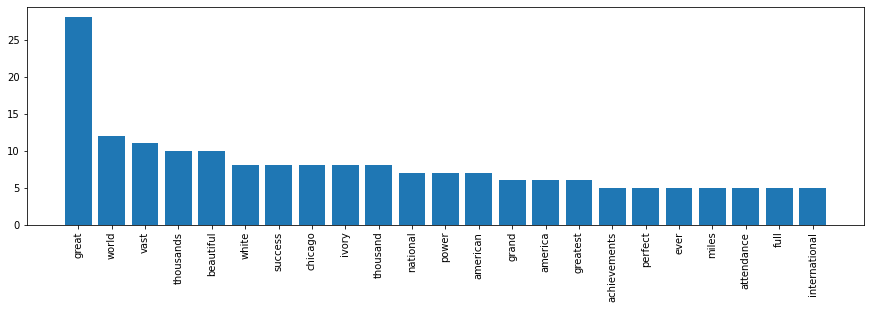

dict_keys(['great', 'world', 'vast', 'thousands', 'beautiful', 'white', 'success', 'chicago', 'ivory', 'thousand', 'national', 'power', 'american', 'grand', 'america', 'greatest', 'achievements', 'perfect', 'ever', 'miles', 'attendance', 'full', 'international'])


In [201]:
# openingRegCountsStopped

# Filter out counts of <5
openingRegCountsStoppedFilt = {key:val for key, val in openingRegCountsStopped.items() if val > 4}

fig8 = plt.figure()
plt.bar(range(len(openingRegCountsStoppedFilt)), list(openingRegCountsStoppedFilt.values()), align='center')
plt.xticks(range(len(openingRegCountsStoppedFilt)), list(openingRegCountsStoppedFilt.keys()), rotation=90)
fig8.set_figwidth(15)
plt.show()
print(openingRegCountsStoppedFilt.keys())

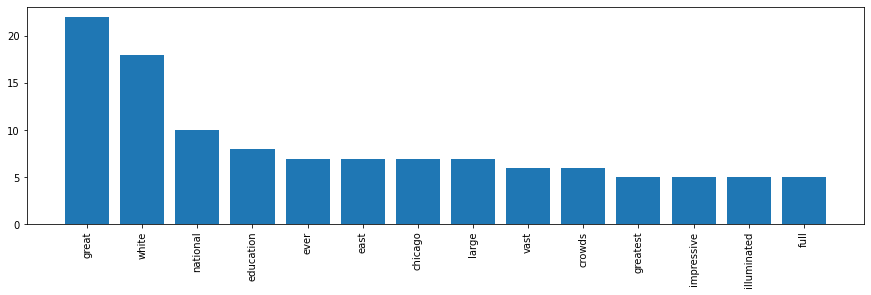

dict_keys(['great', 'white', 'national', 'education', 'ever', 'east', 'chicago', 'large', 'vast', 'crowds', 'greatest', 'impressive', 'illuminated', 'full'])


In [202]:
# openingNatCountsStopped

# Filter out counts of <5
openingNatCountsStoppedFilt = {key:val for key, val in openingNatCountsStopped.items() if val > 4}

fig9 = plt.figure()
plt.bar(range(len(openingNatCountsStoppedFilt)), list(openingNatCountsStoppedFilt.values()), align='center')
plt.xticks(range(len(openingNatCountsStoppedFilt)), list(openingNatCountsStoppedFilt.keys()), rotation=90)
fig9.set_figwidth(15)
plt.show()
print(openingNatCountsStoppedFilt.keys())

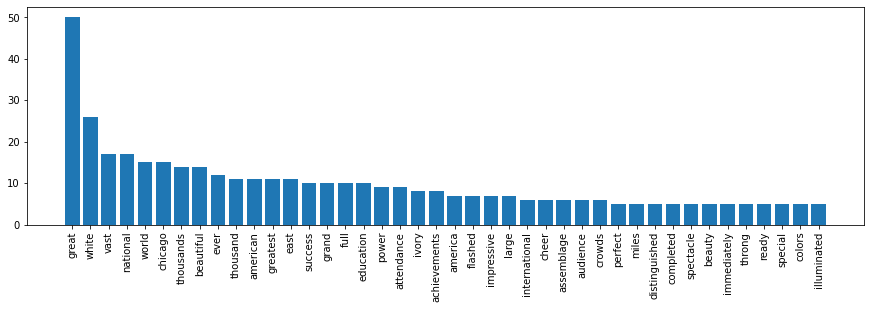

In [195]:
# openingCountsStopped

# Filter out counts of <5
openingCountsStoppedFilt = {key:val for key, val in openingCountsStopped.items() if val > 4}

fig10 = plt.figure()
plt.bar(range(len(openingCountsStoppedFilt)), list(openingCountsStoppedFilt.values()), align='center')
plt.xticks(range(len(openingCountsStoppedFilt)), list(openingCountsStoppedFilt.keys()), rotation=90)
fig10.set_figwidth(15)
plt.show()

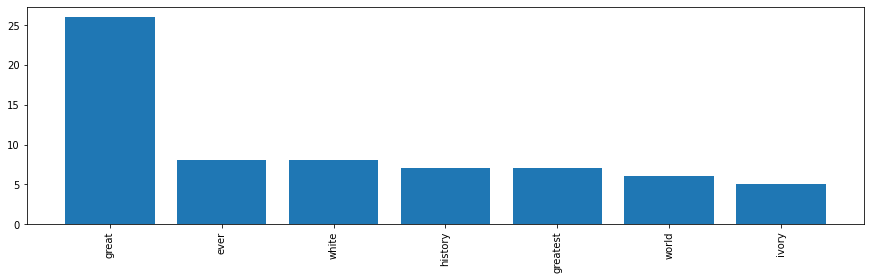

dict_keys(['great', 'ever', 'white', 'history', 'greatest', 'world', 'ivory'])


In [203]:
# closingRegCountsStopped

# Filter out counts of <5
closingRegCountsStoppedFilt = {key:val for key, val in closingRegCountsStopped.items() if val > 4}

fig11 = plt.figure()
plt.bar(range(len(closingRegCountsStoppedFilt)), list(closingRegCountsStoppedFilt.values()), align='center')
plt.xticks(range(len(closingRegCountsStoppedFilt)), list(closingRegCountsStoppedFilt.keys()), rotation=90)
fig11.set_figwidth(15)
plt.show()
print(closingRegCountsStoppedFilt.keys())

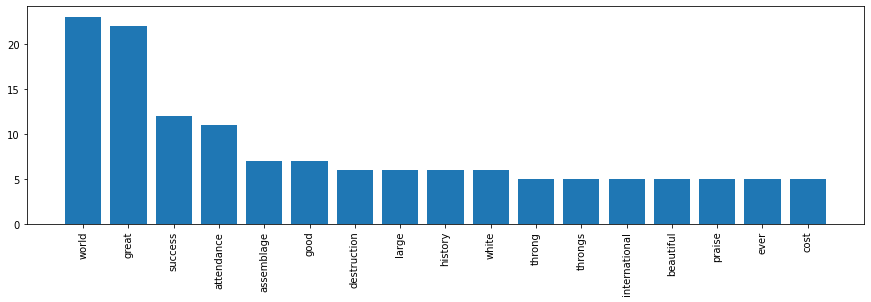

dict_keys(['world', 'great', 'success', 'attendance', 'assemblage', 'good', 'destruction', 'large', 'history', 'white', 'throng', 'throngs', 'international', 'beautiful', 'praise', 'ever', 'cost'])


In [204]:
# closingNatCountsStopped

# Filter out counts of <5
closingNatCountsStoppedFilt = {key:val for key, val in closingNatCountsStopped.items() if val > 4}

fig12 = plt.figure()
plt.bar(range(len(closingNatCountsStoppedFilt)), list(closingNatCountsStoppedFilt.values()), align='center')
plt.xticks(range(len(closingNatCountsStoppedFilt)), list(closingNatCountsStoppedFilt.keys()), rotation=90)
fig12.set_figwidth(15)
plt.show()
print(closingNatCountsStoppedFilt.keys())

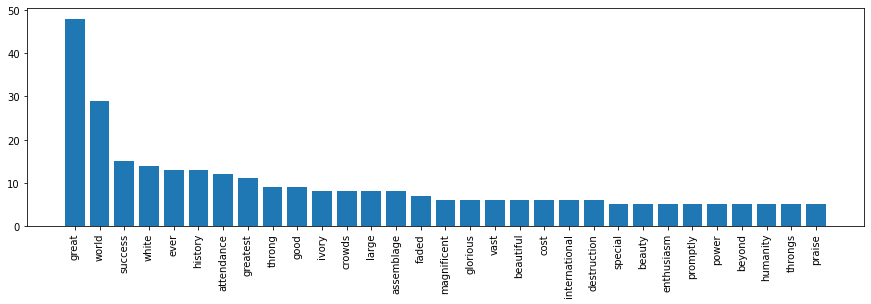

In [198]:
# closingCountsStopped

# Filter out counts of <5
closingCountsStoppedFilt = {key:val for key, val in closingCountsStopped.items() if val > 4}

fig13 = plt.figure()
plt.bar(range(len(closingCountsStoppedFilt)), list(closingCountsStoppedFilt.values()), align='center')
plt.xticks(range(len(closingCountsStoppedFilt)), list(closingCountsStoppedFilt.keys()), rotation=90)
fig13.set_figwidth(15)
plt.show()

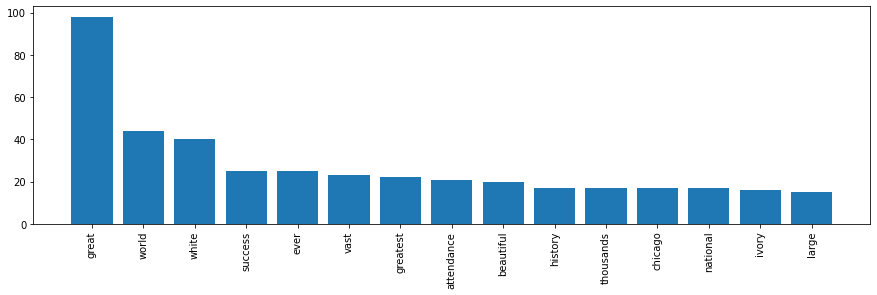

In [200]:
# allCountsStopped

# Filter out counts of <15
allCountsStoppedFilt = {key:val for key, val in allCountsStopped.items() if val > 14}

fig14 = plt.figure()
plt.bar(range(len(allCountsStoppedFilt)), list(allCountsStoppedFilt.values()), align='center')
plt.xticks(range(len(allCountsStoppedFilt)), list(allCountsStoppedFilt.keys()), rotation=90)
fig14.set_figwidth(15)
plt.show()

Below are some breakdowns of the city, state, and newspaper representation in the articles I collected. I aimed to collect 6 local/regional and 6 national newspapers for both opening and closing analysis.

In [130]:
# Data Collection
articles = openingRegArticles + openingNatArticles + closingRegArticles + closingNatArticles
paperDict = {}
cityDict = {}
stateDict = {}
for i in range(len(articles)):
    obj = articles[i]
    if paperDict.__contains__(obj["paper"]):
            paperDict[obj["paper"]] = paperDict[obj["paper"]] + 1
    else:
        paperDict[obj["paper"]] = 1
    if cityDict.__contains__(obj["city"]):
            cityDict[obj["city"]] = cityDict[obj["city"]] + 1
    else:
        cityDict[obj["city"]] = 1
    if stateDict.__contains__(obj["state"]):
            stateDict[obj["state"]] = stateDict[obj["state"]] + 1
    else:
        stateDict[obj["state"]] = 1

Newspapers Breakdown


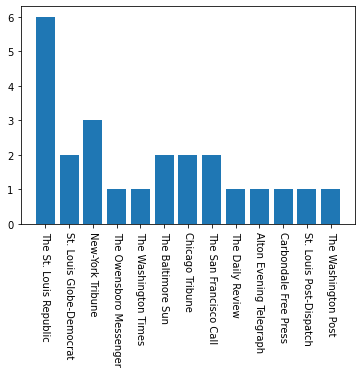

City Breakdown


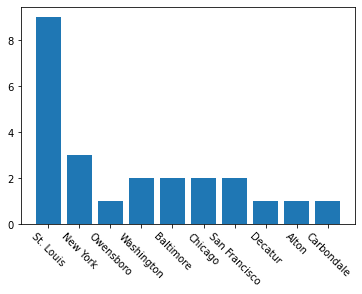

State Breakdown


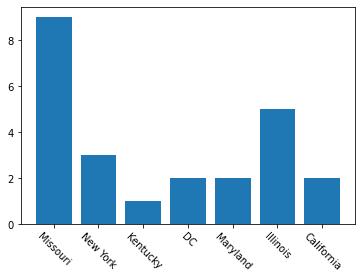

In [145]:
# Plots
print('Newspapers Breakdown')
plt.bar(range(len(paperDict)), list(paperDict.values()), align='center')
plt.xticks(range(len(paperDict)), list(paperDict.keys()), rotation=-90)
plt.show()

print('City Breakdown')
plt.bar(range(len(cityDict)), list(cityDict.values()), align='center')
plt.xticks(range(len(cityDict)), list(cityDict.keys()), rotation=-45)
plt.show()

print('State Breakdown')
plt.bar(range(len(stateDict)), list(stateDict.values()), align='center')
plt.xticks(range(len(stateDict)), list(stateDict.keys()), rotation=-45)
plt.show()